In [1]:
from src.utils import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import pdb
from collections import Counter
from seaborn import heatmap
from matplotlib.colors import LogNorm, Normalize
from src.utils.utils import categories
from process_predictions_and_evaluate import flatten_json_to_df
from datasets import concatenate_datasets
import os


/home/mourad/.conda/envs/econ-test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
now_and_proquest_gold = utils.load_labeled_data(dataset='NOW_and_proquest')

gold_df = concatenate_datasets([now_and_proquest_gold['train'], now_and_proquest_gold['test']]).to_pandas()
gold_df

,id,text,assigned,template,data,source
0,61814,He warned that if Congress failed to make redu...,qz,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...","false#true#future#[{""cause"": ""fiscal"", ""time"":...",proquest
1,833716,At this point they know they can get more reve...,mh,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...","false#true#present#[{""effect"": ""redistribution...",now
2,87067714,Chief among them is the prospect of inflation.,qz,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...",false#false,now
3,61764,But Carter has picked others to woo the ty- co...,qz,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...",false#false,proquest
4,1284684,Chatter is growing louder that the Fed will ch...,mh,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...","false#true#general#[{""effect"": ""rates"", ""time""...",now
...,...,...,...,...,...,...
2766,70684663,"As such, wage pressure may limit the degree to...",az*,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...","false#true#future#[{""cause"": ""wage"", ""time"": ""...",now
2767,59814,"BURNS, NOW associated associated with the Amer...",az*,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...",false#false,proquest
2768,3538590,"To calculate the HCPT thresholds, we assumed t...",az*,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...",false#false,now
2769,59886,Santa's Helpers only fund-raising fund-raising...,az*,"{\n""foreign"": #,\n""contains-narrative"": #,\n""i...","false#true#present#[{""effect"": ""cost"", ""time"":...",proquest


In [3]:
# get all narratives annotated and format into datagrame

gold_df['input'] = gold_df.apply(lambda x: json.loads(utils.reconstruct_training_input(x)), axis=1)

labels = []
for index, row in gold_df.iterrows():
    meta, narrative = flatten_json_to_df(row.input)
    narrative['id'] = row.id
    narrative['source'] = row.source
    labels.append(narrative)

df = pd.concat(labels, axis=0)
df.source = df.source.replace({'now': 'Contemporary', 'proquest': 'Historical'})
df['binary'] = df.category.apply(lambda x: 'no-narrative' if x == 'none' else 'narrative')
df = df.reset_index(drop=True)
df

,time,type,category,id,source,binary
0,present,cause,fiscal,61814,Historical,narrative
1,present,effect,redistribution,833716,Contemporary,narrative
2,present,effect,govt,833716,Contemporary,narrative
3,,,none,87067714,Contemporary,no-narrative
4,,,none,61764,Historical,no-narrative
...,...,...,...,...,...,...
3227,present,cause,wage,70684663,Contemporary,narrative
3228,,,none,59814,Historical,no-narrative
3229,,,none,3538590,Contemporary,no-narrative
3230,present,effect,cost,59886,Historical,narrative


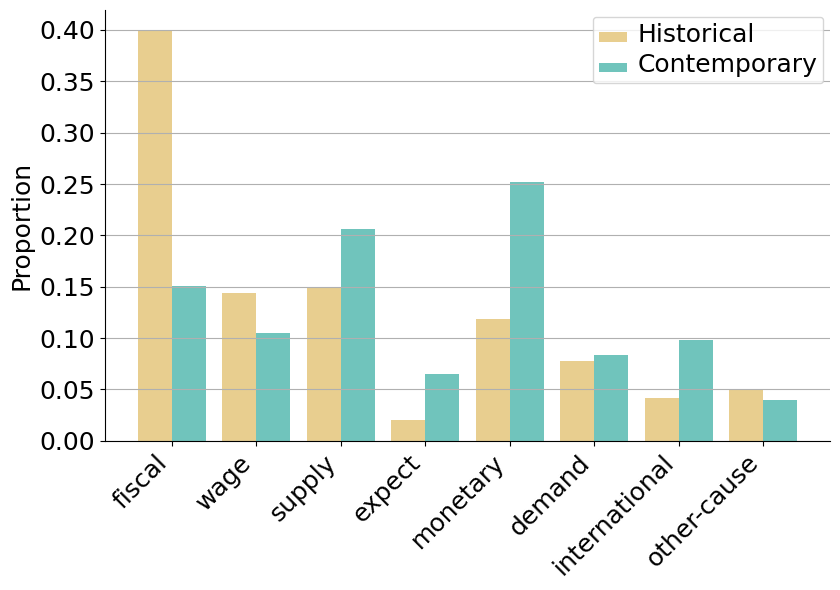

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

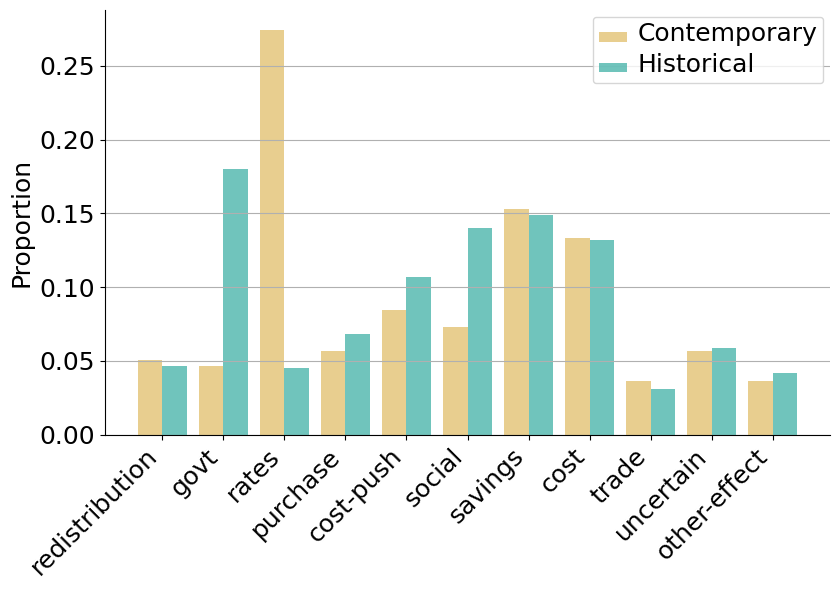

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

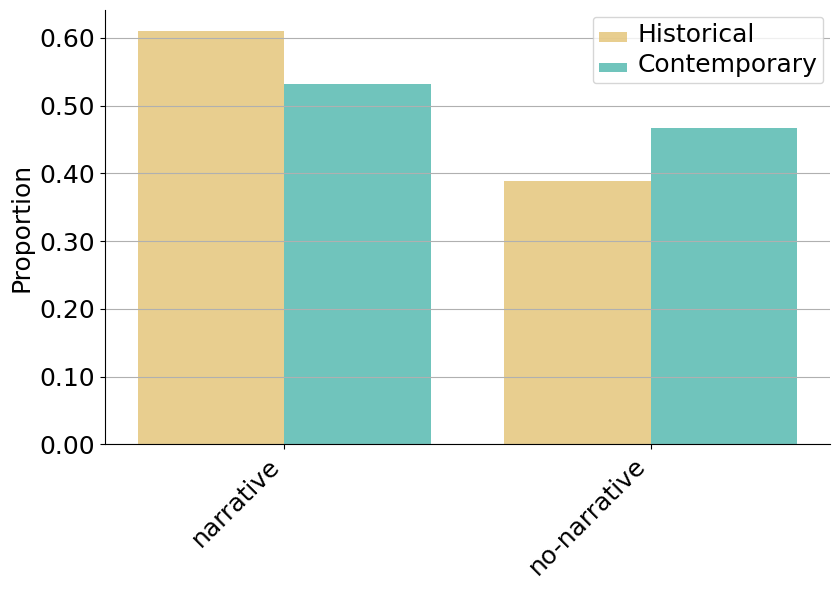

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
out_dir = "output/barplots"

fontsize = 18
data_df = df.copy()

for property in ['cause', 'effect', 'binary']: # binary
    plt.figure(figsize=(8.5, 6))

    data_df = df.copy()
    if property != 'binary':
        data_df = data_df[data_df.type == property]

    # Set custom colors for the plot
    colors = ['#E1BE6A', '#40B0A6']

    x = 'binary' if property == 'binary' else 'category'

    # Plot the histogram with custom colors
    ax = sns.histplot(data=data_df, x=x, stat='proportion', discrete=True, hue='source', multiple='dodge', shrink=.8, common_norm=False, edgecolor='none', palette=colors, binwidth=2)

    ax.yaxis.grid(True)  # Add horizontal grid lines

    ax.get_legend().set_title("")
    plt.setp(plt.gca().get_legend().get_texts(), fontsize=fontsize)
    plt.title("")
    plt.xlabel("")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    
    ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])

    
    plt.ylabel("Proportion", fontsize=fontsize)

    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
    
    ax.spines[['right', 'top']].set_visible(False)
    plt.tight_layout()
    plt.savefig(f"{out_dir}/{property}_barplot.pdf", dpi=300)

    plt.show()
    ax.clear()
    plt.clf()
    
    plt.tight_layout()
    plt.savefig(f"{out_dir}/{property}_barplot_indiv.pdf", dpi=300)

    plt.show()
    ax.clear()
    plt.clf()

In [24]:
def create_label_heatmap(df, out_filename):
    # Convert each tuple to a list so that we can explode them later.
    # If the tuple is empty, replace it with ["none"].
    df["gold"] = df["gold"].apply(lambda t: list(t) if t else ["none"])
    df["pred"] = df["pred"].apply(lambda t: list(t) if t else ["none"])

    # Explode both the 'gold' and 'pred' columns so that each combination is in its own row.
    df_exploded = df.explode("gold").explode("pred")

    # (Optional) Filter rows based on the 'test' column if desired.
    # df_exploded = df_exploded[df_exploded['test'] == False]

    # Group by the gold and pred labels to count the occurrences.
    counts = df_exploded.groupby(["gold", "pred"]).size().reset_index(name="count")

    # Pivot the table so that rows are gold labels and columns are pred labels.
    heatmap_data = counts.pivot(index="gold", columns="pred", values="count").fillna(0)

    # Reorder the rows so that "none" is last (if present)
    if "none" in heatmap_data.index:
        new_index = [label for label in heatmap_data.index if label != "none"] + ["none"]
        heatmap_data = heatmap_data.reindex(new_index)

    # Reorder the columns so that "none" is last (if present)
    if "none" in heatmap_data.columns:
        new_columns = [label for label in heatmap_data.columns if label != "none"] + ["none"]
        heatmap_data = heatmap_data[new_columns]

    # Create the heatmap using seaborn.
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, norm=LogNorm(), cmap="Blues", fmt='g')
    plt.title("Gold vs. Pred Heatmap")
    plt.ylabel("Gold Labels")
    plt.xlabel("Pred Labels")
    plt.savefig(out_filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return heatmap_data

output/confusion_matrices/phi2_ft_micro_proquest_proquest.pdf


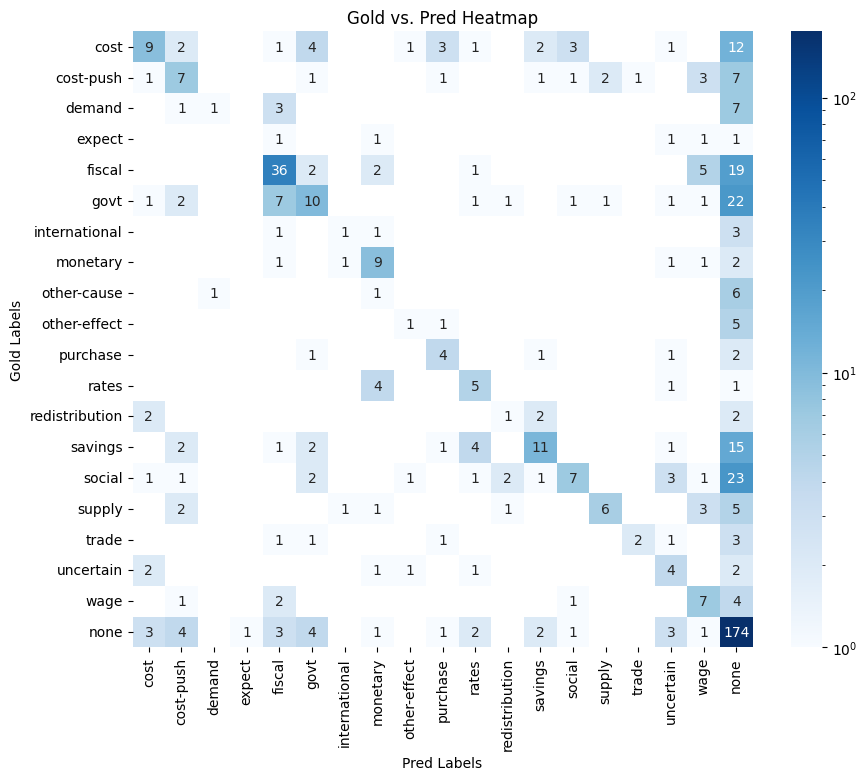

In [23]:
# base data dir
data_dir = "output/gold_vs_preds"
out_dir = "output/confusion_matrices"

#make output dir if it doesn't exist
os.makedirs(out_dir, exist_ok=True)

# get files in output/gold_vs_preds
files = os.listdir(data_dir)
files = [f for f in files if f.endswith(".pkl")]

for file in files:
    df = pd.read_pickle(f"{data_dir}/{file}")
    # Create and display the heatmap
    heatmap_data = create_label_heatmap(df, f"{out_dir}/{file.split('.')[0]}.pdf")
